In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [60]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_02.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,1168053100,논현2동,4004,대형할인점,67,1007350.0
1,20200201,1141072000,북가좌2동,7120,사우나,7,49000.0
2,20200201,1126057500,면목3.8동,4499,기타잡화,11,79400.0
3,20200201,1132051500,창5동,5201,컴 퓨 터,1,15000.0
4,20200201,1147061000,신월6동,9099,기타건축자재,3,24500.0


In [61]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


#### 1월 데이터 가공

In [62]:
adstrd_code_01 = card_01['adstrd_code']
mrhst_induty_cl_code_01 = card_01['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_01:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_01:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card01 = {"receipt_dttm" : card_01['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_01['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_01['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_01['selng_cascnt'], "salamt" : card_01['salamt']}

df_card01 = pd.DataFrame(data_card01)
df_card01

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,11740,성내3동,70,약국,463,5843230.0
1,20200104,11740,성내3동,70,치과의원,33,7835550.0
2,20200104,11740,성내3동,70,한의원,53,4589800.0
3,20200104,11740,성내3동,70,의원,339,9267240.0
4,20200104,11740,성내3동,61,자동차정비,19,4441000.0
5,20200104,11740,성내3동,51,기타 교육,54,1446900.0
6,20200104,11740,성내3동,51,보습학원,12,3876000.0
7,20200104,11740,성내3동,50,일반 서적,58,1292090.0
8,20200104,11740,성내3동,42,정장,13,743000.0
9,20200104,11740,성내3동,40,슈퍼 마켓,919,11931520.0


In [63]:
df_card01['mrhst_induty_cl_code'].value_counts()
code = []
for i in df_card01['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code , '\n')
print(len(code), "\n")
code.sort()
print(code)

[80, 70, 83, 71, 40, 21, 51, 61, 42, 44, 91, 50, 22, 93, 92, 90, 99, 20, 10, 52, 33, 31, 82, 84, 34, 81, 43, 32, 30, 11, 60, 41, 62, 96, 95] 

35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [64]:
adstrd_name_seoul
gu_code = []
gu_name = []
for i in adstrd_name_seoul['total_adstrd']:
    gu_name.append(i)
    
for i in adstrd_name_seoul['exp']:
    gu_code.append(int(i))

print(gu_name)
print(gu_code)

gu_nm_code = pd.DataFrame({'exp' : gu_code, 'total_adstrd' : gu_name})
gu_nm_code

['서울특별시 종로구', '서울특별시 중구', '서울특별시 용산구', '서울특별시 성동구', '서울특별시 광진구', '서울특별시 동대문구', '서울특별시 중랑구', '서울특별시 성북구', '서울특별시 강북구', '서울특별시 도봉구', '서울특별시 노원구', '서울특별시 은평구', '서울특별시 서대문구', '서울특별시 마포구', '서울특별시 양천구', '서울특별시 강서구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 영등포구', '서울특별시 동작구', '서울특별시 관악구', '서울특별시 서초구', '서울특별시 강남구', '서울특별시 송파구', '서울특별시 강동구']
[11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305, 11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710, 11740]


,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


In [65]:
seoul01 = []
seoul01_sum = []

is_code = df_card01['adstrd_code'] == 11110

for i in code:
    is_name = df_card01['mrhst_induty_cl_code'] == i
    seoul = df_card01[is_code & is_name]
    seoul01.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul01_sum.append(sum_num)
    
seoul01[0]
print(seoul01_sum)
print(code)

mean = []

for i in seoul01_sum:
    mean.append(i/28)

Jongrogu01 = pd.DataFrame({'code' : code, 'total_sum' : seoul01_sum, 'mean' : mean})
Jongrogu01

[14543, 6965, 5147, 61849, 15203, 39, 3988, 178, 3042, 1285, 625096, 5079, 19284, 2756, 21386, 274046, 2971, 1412, 85, 38629, 861185, 251856, 25082, 1477633, 5534, 3032, 114966, 1130, 1155, 33556, 1132, 3011, 0, 64, 21373]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,14543,519.392857
1,11,6965,248.750000
2,20,5147,183.821429
3,21,61849,2208.892857
4,22,15203,542.964286
5,30,39,1.392857
6,31,3988,142.428571
7,32,178,6.357143
8,33,3042,108.642857
9,34,1285,45.892857


### 2월 데이터 가공

In [66]:
adstrd_code_02 = card_02['adstrd_code']
mrhst_induty_cl_code_02 = card_02['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_02:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_02:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card02 = {"receipt_dttm" : card_02['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_02['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_02['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_02['selng_cascnt'], "salamt" : card_02['salamt']}

df_card02 = pd.DataFrame(data_card02)
df_card02

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0
5,20200201,11305,송천동,60,수입자동차,1,500000.0
6,20200201,11350,월계1동,70,기타의료기관및기타의료기기,2,4670357.0
7,20200201,11200,성수2가3동,42,내의판매점,3,16000.0
8,20200201,11530,고척2동,21,헬스 크럽,1,264000.0
9,20200201,11680,도곡2동,50,과학기자재,1,287100.0


#### 2월 상반기

In [67]:
is_date = df_card02['receipt_dttm'] < 20200215
df_card02_1 = df_card02[is_date]
df_card02_1

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0
5,20200201,11305,송천동,60,수입자동차,1,500000.0
6,20200201,11350,월계1동,70,기타의료기관및기타의료기기,2,4670357.0
7,20200201,11200,성수2가3동,42,내의판매점,3,16000.0
8,20200201,11530,고척2동,21,헬스 크럽,1,264000.0
9,20200201,11680,도곡2동,50,과학기자재,1,287100.0


In [68]:
df_card02['mrhst_induty_cl_code'].value_counts()
code = []
for i in df_card02['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code , '\n')
print(len(code), "\n")
code.sort()
print(code)

[80, 71, 70, 83, 21, 40, 51, 61, 91, 42, 44, 50, 22, 93, 92, 90, 99, 52, 33, 20, 31, 10, 84, 34, 82, 43, 32, 30, 60, 81, 11, 41, 62, 96, 95] 

35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [69]:
adstrd_name_seoul
gu_code = []
gu_name = []
for i in adstrd_name_seoul['total_adstrd']:
    gu_name.append(i)
    
for i in adstrd_name_seoul['exp']:
    gu_code.append(int(i))

print(gu_name)
print(gu_code)

gu_nm_code = pd.DataFrame({'exp' : gu_code, 'total_adstrd' : gu_name})
gu_nm_code

['서울특별시 종로구', '서울특별시 중구', '서울특별시 용산구', '서울특별시 성동구', '서울특별시 광진구', '서울특별시 동대문구', '서울특별시 중랑구', '서울특별시 성북구', '서울특별시 강북구', '서울특별시 도봉구', '서울특별시 노원구', '서울특별시 은평구', '서울특별시 서대문구', '서울특별시 마포구', '서울특별시 양천구', '서울특별시 강서구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 영등포구', '서울특별시 동작구', '서울특별시 관악구', '서울특별시 서초구', '서울특별시 강남구', '서울특별시 송파구', '서울특별시 강동구']
[11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305, 11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710, 11740]


,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


In [71]:
seoul02_1 = []
seoul02_sum_1 = []

is_code = df_card02_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_1['mrhst_induty_cl_code'] == i
    seoul = df_card02_1[is_code & is_name]
    seoul02_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_1.append(sum_num)
    
print(seoul02_sum_1)
print(code)

mean = []

for i in seoul02_sum:
    mean.append(i/14)

Jongrogu02_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum, 'mean' : mean})
Jongrogu02_1

[3431, 593, 1336, 17115, 4823, 29, 1028, 125, 1962, 358, 137824, 3004, 3322, 678, 4382, 49299, 1321, 684, 59, 8875, 44048, 57306, 6512, 300898, 1153, 722, 26415, 493, 537, 13414, 610, 1089, 0, 80, 6204]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3431,245.071429
1,11,593,42.357143
2,20,1336,95.428571
3,21,17115,1222.500000
4,22,4823,344.500000
5,30,29,2.071429
6,31,1028,73.428571
7,32,125,8.928571
8,33,1962,140.142857
9,34,358,25.571429


### 상대값 = {(2월 평균 - 1월 평균)/(1월 평균)} * 100

### 1월&2월(상반기) 평균 비교

In [73]:
per_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_1['mean'][i]
    if(a != 0):
        per_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_1.append(-1)
per_1

[-52.815787664168326,
 -82.97200287150037,
 -48.08626384301535,
 -44.655532021536324,
 -36.55199631651647,
 48.71794871794874,
 -48.445336008024064,
 40.4494382022472,
 28.99408284023669,
 -44.280155642023345,
 -55.90309328487144,
 18.291002165780675,
 -65.54656710226095,
 -50.79825834542816,
 -59.01991957355279,
 -64.02136867533189,
 -11.073712554695387,
 -3.1161473087818794,
 38.82352941176472,
 -54.05006601258122,
 -89.77037454205542,
 -54.49304364398705,
 -48.07431624272386,
 -59.2729723821815,
 -58.33032164799421,
 -52.37467018469657,
 -54.04728354470018,
 -12.743362831858398,
 -7.012987012987021,
 -20.050065562045532,
 7.7738515901059975,
 -27.66522749916971,
 -1,
 150.00000000000003,
 -41.94544518785383]

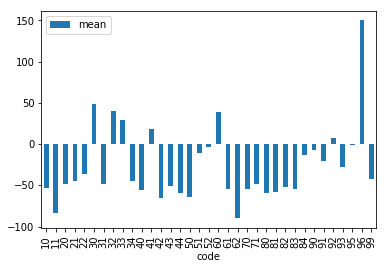

In [74]:
data_1 = pd.DataFrame({"code": code, "mean": per_1})
data_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

## 2월(하반기) 데이터 가공

In [75]:
is_date = df_card02['receipt_dttm'] > 20200214
df_card02_2 = df_card02[is_date]
df_card02_2

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
160531,20200215,11710,거여1동,70,동물병원,13,730100.0
160532,20200215,11680,대치4동,70,약국,442,7531530.0
160533,20200215,11650,서초1동,80,서양음식,1840,19929464.0
160534,20200215,11440,대흥동,71,미 용 원,59,2890700.0
160535,20200215,11260,망우본동,70,약국,394,6041060.0
160536,20200215,11650,서초4동,80,일반한식,3483,125463882.0
160537,20200215,11560,여의동,80,서양음식,9917,155299863.0
160538,20200215,11680,삼성2동,80,일반한식,2891,97811380.0
160539,20200215,11680,역삼1동,80,일반한식,14203,498420832.0
160540,20200215,11530,신도림동,80,스넥,485,5613050.0


In [77]:
seoul02_2 = []
seoul02_sum_2 = []

is_code = df_card02_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_2['mrhst_induty_cl_code'] == i
    seoul = df_card02_2[is_code & is_name]
    seoul02_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_2.append(sum_num)
    
seoul02_2[0]
print(seoul02_sum_2)
print(code)

mean = []

for i in seoul02_sum_2:
    mean.append(i/15)

Jongrogu02_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_2, 'mean' : mean})
Jongrogu02_2

[7633, 1120, 2777, 36070, 9667, 38, 2583, 289, 4833, 820, 372638, 7440, 7347, 1543, 9829, 106573, 3439, 1477, 155, 21172, 966566, 133563, 14682, 686455, 2414, 1526, 63425, 1134, 1402, 35084, 1417, 1736, 0, 261, 65206]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,7633,508.866667
1,11,1120,74.666667
2,20,2777,185.133333
3,21,36070,2404.666667
4,22,9667,644.466667
5,30,38,2.533333
6,31,2583,172.200000
7,32,289,19.266667
8,33,4833,322.200000
9,34,820,54.666667


In [78]:
per_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_2['mean'][i]
    if(a != 0):
        per_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_2.append(-1)
per_2

[-2.026633661096969,
 -69.98324958123952,
 0.7136843468687153,
 8.86298350283215,
 18.694117389111813,
 81.88034188034187,
 20.90270812437312,
 203.07116104868913,
 196.5680473372781,
 19.118028534370936,
 11.277457115920333,
 173.43965347509354,
 -28.881974694046868,
 4.50895016932752,
 -14.208048879329164,
 -27.40771014111986,
 116.07090766296422,
 95.25967894239848,
 240.39215686274514,
 2.3093185603216924,
 109.50858797277397,
 -1.0078775173114742,
 9.2672035722829,
 -13.281398922014699,
 -18.57366582339477,
 -6.05101143359719,
 2.9811712448317946,
 87.32743362831859,
 126.58585858585857,
 95.16668653395321,
 133.66313309776208,
 7.623159526181773,
 -1,
 661.25,
 469.49359784151346]

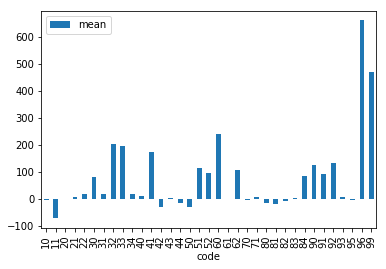

In [81]:
data_2 = pd.DataFrame({"code": code, "mean": per_2})
data_2.plot(x = "code", y = "mean", kind = 'bar')